# CS 109A/AC 209A/STAT 121A Data Science: Homework 4
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 5th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Keery, Sean

### Part (b): Course Number

CS 109a 

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

### Visual inspection

I opened the text file in Excel and noticed that the values for the first three predictors are equal.

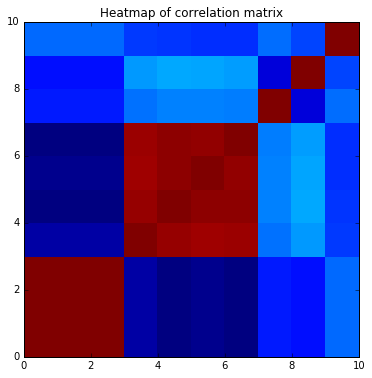

In [4]:
#load data
data=np.loadtxt('./datasets/dataset_1.txt',delimiter=',',skiprows=1)

#split predictors and response
x=data[:,:-1]
y=data[:,-1]

#compute matrix of correlation coefficients
corr_matrix=np.corrcoef(x.T)
corr_matrix.shape

fig,ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

### Do the predictors fall naturally into groups based on the correlation values?

There seems to be five groups.

### How many predictors will you pick? 

Five.

### Which ones will you choose?

I would pick one from each group.


### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

In [26]:
# Exhaustive search
best_subset = [] 
# predictor_set=set(range(10))
predictor_set = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
min_bic = 1e10 # set some initial large value for min BIC score
#outer loop
for k in range(10):
    # subsets for size k
    subsets_k =it.combinations(predictor_set,k+1)
    #inner loop to compare BIC within subsets
    for subset in subsets_k:
        x_subset = x[:, subset]
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        #compute BIC
        bic = results.bic
#         print r_squared,bic,subset[:]
        # keep track of best one
        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset 
        # we've found so far, remember the current predictor subset as the best!
        if(bic < min_bic): 
            min_bic = bic
            best_subset = subset[:]
    
print('Best subset by exhaustive search:')
print sorted(best_subset)

Best subset by exhaustive search:
[0, 5, 7, 8, 9]


In [27]:
### Step-wise Forward Selection
d = x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):    
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print 'Step-wise forward subset selection:'
print sorted(best_subset) # add 1 as indices start from 0

Step-wise forward subset selection:
[0, 5, 7, 8, 9]


#### The predictors match the ones I selected 

### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

In [32]:
#Apply Lasso regression with regularization parameter  λ=0.01 and fit a regression model.
reg = Lasso_Reg(alpha = 0.01)
reg.fit(x, y)
coefficients = reg.coef_

print 'Lasso:'
print 'Coefficients:', coefficients
print  'Predictors that are assigned non-zero coefficients are:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Lasso:
Coefficients: [ 0.02717417  0.          0.         -0.         -0.02532806 -0.         -0.
  0.04397321 -0.40612185 -0.22260474]
Predictors that are assigned non-zero coefficients are: [0, 4, 7, 8, 9]


Yes, they correspond.

In [31]:
#Apply Ridge regression with regularization parameter  λ=0.01 and fit a regression model.
reg = Ridge_Reg(alpha = 0.01)
reg.fit(x, y)
coefficients = reg.coef_

print 'Ridge:'
print 'Coefficients:', coefficients
print  'Predictors that are assigned non-zero coefficients are:', [i for i, item in enumerate(coefficients) if abs(item) > 0]


Ridge:
Coefficients: [ 0.04353543  0.04353543  0.04353543  0.55217415 -0.19706852 -0.61421737
  0.30484213  0.18742866 -0.50083242 -0.35908145]
Predictors that are assigned non-zero coefficients are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

No, they do not correspond.  The lasso regression shows that all the parameters should be included in the model.  The regularization parameter causes this to occur.

### Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

The first three coefficients are the same in the Ridge regression, while the Lasso coefficient has a higher first coefficient.  I cannot give an explanation right now, I'll come back to it.

## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


In [67]:
# data2=np.loadtxt('./datasets/dataset_2.txt',delimiter=',',skiprows=1,index=1)
data2 = pd.read_csv('./datasets/dataset_2.txt', sep=',')
data2['symboling']=data2['symboling'].astype(object)
data2.head()

,horsepower,highway-mpg,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,price
0,95.0,24.0,0,120.232558,peugot,gas,std,four,wagon,rwd,...,l,four,120.0,mpfi,3.46,2.19,8.4,5000.0,19.0,16695.0
1,116.0,30.0,2,134.000000,toyota,gas,std,two,hardtop,rwd,...,ohc,four,146.0,mpfi,3.62,3.50,9.3,4800.0,24.0,11199.0
2,121.0,28.0,0,188.000000,bmw,gas,std,two,sedan,rwd,...,ohc,six,164.0,mpfi,3.31,3.19,9.0,4250.0,21.0,20970.0
3,184.0,16.0,0,120.232558,mercedes-benz,gas,std,four,sedan,rwd,...,ohcv,eight,308.0,mpfi,3.80,3.35,8.0,4500.0,14.0,40960.0
4,111.0,29.0,0,102.000000,subaru,gas,turbo,four,sedan,4wd,...,ohcf,four,108.0,mpfi,3.62,2.64,7.7,4800.0,24.0,11259.0


In [68]:
# Separate predictors and response
x_df = data2.iloc[:,:-1]
y_df = data2.iloc[:,-1]

d = np.shape(x_df)[1] # no. of attributes

# Create a new data frame

x_df_expanded = pd.DataFrame() 

# Need to make symboling column datatype equal object

# x_df['symboling'].dtype='object'

# Iterate over all attributes
for column in x_df.columns:
    # Check if attribute is not categorical: either dtype is not object
    if(x_df[column].dtype != np.dtype('object')):
        x_df_expanded = pd.concat([x_df_expanded, x_df[column]], axis=1)
    else:
        # otherwise: use one-hot encoding
        encoding = pd.get_dummies(x_df[column])  # Convert categorical variable into dummy/indicator variables
        # append expanded attribute to data frame
        x_df_expanded = pd.concat([x_df_expanded, encoding], axis=1)
        print encoding.iloc[:1].values
x_df_expanded.head()

[[ 0.  1.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.]]
[[ 0.  1.]]
[[ 1.  0.]]
[[ 1.  0.]]
[[ 0.  0.  0.  0.  1.]]
[[ 0.  0.  1.]]
[[ 1.  0.]]
[[ 0.  1.  0.  0.  0.]]
[[ 0.  0.  1.  0.]]
[[ 0.  0.  0.  1.  0.]]


,horsepower,highway-mpg,-2.0,0.0,1.0,1.09604519774,2.0,3.0,normalized-losses,audi,...,1bbl,2bbl,idi,mpfi,spdi,bore,stroke,compression-ratio,peak-rpm,city-mpg
0,95.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,120.232558,0.0,...,0.0,0.0,0.0,1.0,0.0,3.46,2.19,8.4,5000.0,19.0
1,116.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,134.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,3.62,3.50,9.3,4800.0,24.0
2,121.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,188.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,3.31,3.19,9.0,4250.0,21.0
3,184.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,120.232558,0.0,...,0.0,0.0,0.0,1.0,0.0,3.80,3.35,8.0,4500.0,14.0
4,111.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0,102.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,3.62,2.64,7.7,4800.0,24.0


### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

In [49]:
# Convert data frame to array
x = x_df_expanded.values
y = y_df.values

# ii. SPLIT TRAIN AND TEST SETS
# No. of training points
n = x.shape[0]
n_train = int(np.round(n*0.25))

# First 25% train, remaining test
x_train = x[0:n_train,:]
y_train = y[0:n_train]
x_test = x[n_train:,:]
y_test = y[n_train:]

In [75]:
# Fit sklearn multiple linear regression model
reg = Lin_Reg()
reg.fit(x_train, y_train)
    
# Get coefficients from fitted model
w = reg.coef_
c = reg.intercept_

# print w,c

regscore=reg.score(x_train, y_train)
regtestscore=reg.score(x_test, y_test)
print "Train score    | Test score"
print regscore,"|",regtestscore

Train score    | Test score
0.999511805235 | 0.841119316862


Those scores look pretty good.
I don't see any discrepancies.
Regularization is not needed.

### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

In [78]:
degrees=7

for d in range(10**1/degrees, 10**degrees):
        reg=Ridge_Reg(alpha = d)
        model_results, _ =reg.fit(x_train, y_train)
        R2_train[d, i] = model_results.rsquared

#Apply Ridge regression with regularization parameter  λ=0.01 and fit a regression model.

coefficients = reg.coef_

print 'Ridge:'
print 'Coefficients:', coefficients
print  'Predictors that are assigned non-zero coefficients are:', [i for i, item in enumerate(coefficients) if abs(item) > 0]



TypeError: 'Ridge' object is not iterable

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

### Part (b): Debug our implementation of ridge regression
You're a grader for CS109A, the following is an implemention of Ridge regression (via the above approach) submitted by a student. The dataset is ``dataset_3.txt``. The regression model is fitted to a training set, and the R^2 scores of the fitted model on the training and test sets are plotted as a function of the regularization parameter. Grade this solution according to the following rubric (each category is equally weighted): 

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

In addition to providing an holistic grade (between 0 to 5), provide a corrected version of this code that is submission quality.

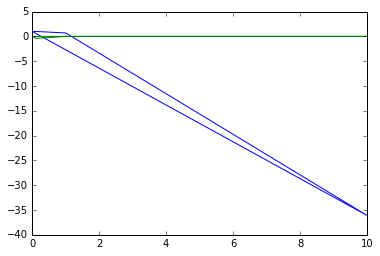

In [91]:
# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[0]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]
    import sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(m,x_test,y_test, reg_param):
    n=np.shape(x_train)[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+np.shape(x_test)[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.5))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i

# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
for j in range(0,5):    
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
plt.plot(a,rstr)
plt.plot(a,rsts)

I'd give them a 3 assuming 1.3 points for each of the categories below:

correctness 1.3

interpretation (if applicable) .5

code/algorithm design .5

presentation .75


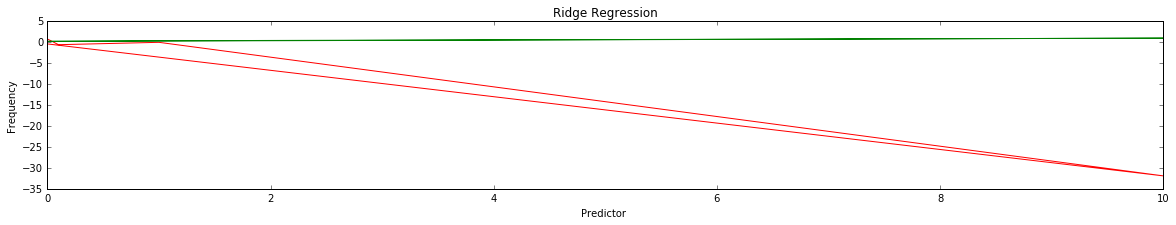

In [97]:
#do the imports first
import sklearn

# Ridge fit function
# input: 
# x_train x training data
# y_train y training data
# reg_param regularization parameter
# output:
# model - is that really what we want to return
def ridge(x_train, y_train, reg_param):
    n=x_train.shape[0]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+x_train.shape[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]

    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(m,x_test,y_test, reg_param):
    n=x_train.shape[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+x_test.shape[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = int(np.round(data.shape[0]*0.5))
x_train = data[:n,:100]
y_train = data[:n,100]
x_test = data[n:2*n,:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
rstr =np.zeros(5)
rsts =np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i
    for j in range(0,5):    
        m =ridge(x_train,y_train,10**i)
        rstr[j]=score(m,x_train,y_train,a[j])
        rsts[i]=score(m,x_test,y_test,10**i)

# Plot of scores
fig, axes = plt.subplots(1, 1, figsize=(20, 3))
# Set plot labels
axes.set_title('Ridge Regression')
axes.set_xlabel('Predictor ')
axes.set_ylabel('Frequency')
plt.plot(a,rsts,c='r')
plt.plot(a,rstr,c='g')

## Challenge Problem: Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_4.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

**Note**: For additional information about the attributes used, please look up the file `dataset_4_description.txt`. This files also contains details of attributes that have been omitted from the data set.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 